# Chapter #2: Data & Sampling Distribution

Based on Practical Statistics for Data Scientists

A proliferação de dados de qualidade e relevância distintos reinforça a necessidade de amostragem como uma ferramente para trabalhar eficientemente com uma variedade de dados e para minimizar bias.
Mesmo em um projeto de Big Data, modelos preditivos são tipicamente desenvolvidos e têm seu piloto com amostras

### RANDOM SAMPLING & SAMPLE BIAS

**Samples/Amostra**: É um subconjunto (subset) dos dados de um conjunto de dados maior.

**Random Sampling/Amostragem Aleatória** é o processo em que cada membro disponível de uma população tem chances iguais de serem escolhidos para a amostra em cada sorteio. O resultado de uma random sampling é uma amostra aleatória simples (simple random sample).

A amostragem pode ser feita ou não com replacement.

**A qualidade dos dados frequentemente importa mais do que a quantidade de dados quando se faz uma estimativa ou modeo baseado em uma amostra**

#### KEY TERMS FOR DATA SAMPLING
- **Sample**: É um subset de um dataset maior
- **Population**: É o dataset maior ou a ideia deste dataset
- **N/n**: Tamanho da população / Tamanho da amostra
- **Random Sampling**: Sorteio aleatório de elementos para uma amostra 
- **Stratified Sampling**: Divisão da população em stratas. Amostragem aleatória dos elementos de cada strata.
- **Stratum/Strata**: Subgrupo homogêneo de uma população com características comuns.
- **Simple random sample**: A amostra resultante de uma amostragem aleatória sem estratificação da população.
- **Bias**: Erro sistemático
- **Sample bias**: Amostra que falha em representar a população.

##### Sample Bias
Dificilmente uma amostra representará exatamente a sua população. O sample bias ocorre quando essa diferença é significativa e pode se esperar de que continue para outras amostrar sorteadas da mesma forma que a primeira.

**Self-selection sampling bias** é um exemplo comum de sample bias.

##### Bias
Refere-se aos erros de medição ou amostragem que são sistemáticos e produzidos pelo processo de medição e amostragem.

Um processo unbiased também produzirá erro, mas é aleatório e não tende fortemente em nenhuma direção. Um biased process possui random error (erro aleatório), mas também bias.

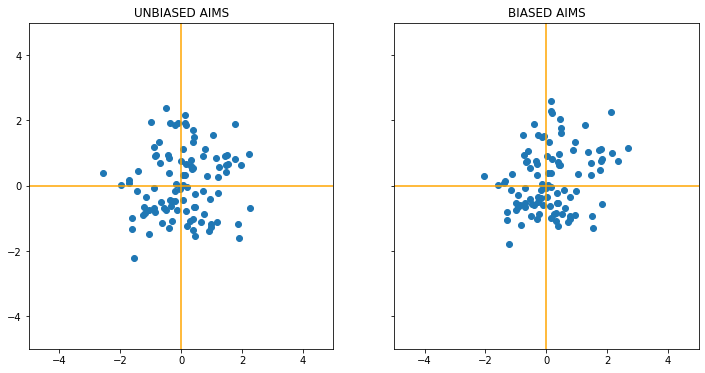

In [4]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

n = 100
b = .2

points_x = np.random.normal(0, 1, n)
points_y = np.random.normal(0, 1, n)

unbiased_x = points_x
unbiased_y = points_y

biased_x, biased_y = zip(*[(x * (1+b), y * (1+b)) if (x >= 0 and y >= 0)
                      else (x * (1-b), y * (1-b))
                      for x, y in zip(points_x, points_y)])


fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 6))

ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)

ax1.scatter(unbiased_x, unbiased_y)
ax1.axvline(0, color="orange"), ax1.axhline(0, color="orange")
ax1.set_title("Unbiased aims".upper())

ax2.scatter(biased_x, biased_y)
ax2.axvline(0, color="orange"), ax2.axhline(0, color="orange")
ax2.set_title("Biased aims".upper());

#### Random Selection
Existe um leque de métodos de amostragem, mas no coração de todos eles está o random sampling.

#### Size vs Quality: When does size matter?
Tempo e esforço gasto na amostragem aleatória não apenas reduz o bias, mas tabmém permite maior atenção ao EDA e à qualidade dos dados. O cenário clássico para o Big Data é quando os dados não são apenas volumoso, mas também escasso.

#### KEY IDEAS
- Mesmo na era do big data, amostragem aleatória continua sendo um ponto importante.
- O bias ocorre quando medidas ou observações estão sistematicamente com erro porque não são representativas de toda a população
- A qualidade dos dados é frequentemente mais importante que a quantidade, random sampling pode reduzir o bias e facilitar a melhoria da qualidade que, sem ela, seria muito custoso.


### SELECTION BIAS
Refere-se a seleção de dados de uma forma que leva a uma conclusão enganosa ou efêmera.

#### KEY TERMS FOR SELECTION BIAS
- **Selection Bias**: Bias resultante da forma em que observações são selecionadas.
- **Data Snooping**: Caça extensiva nos dados em busca de algo interessante.
- **Vast Search Effect**: Bias ou non-reproducibility resultante de repetidas modelagem de dados or modelagem de dados com grande número de variáveis preditoras.

#### Regression to the Mean
Refere-se ao fenômeno envolvendo medidas sucessivas de uma variável. Valores extremos tendem a ser seguidos de valores mais ao próximos às medidas centrais. 
Dar foco especial e significado aos valores extremos pode levar a uma forma de selecion bias.

#### KEY IDEAS
- Especificar a hipótese e coletar dados seguindo randomização e princípios de random samplings é uma prevenção contra bias.
- Todas as outras formas de análise de dados corre o risco de bias. Resultante da coleta de dados ou processo de análise.

### SAMPLING DISTRIBUTION OF A STATISTIC
O termo sampling distribution de uma estatística se refere à distribuição de alguma estatística de amostra em muitas amostras sorteadas de uma mesma população.

#### KEY TERMS FOR SAMPLING DISTRIBUTION
- **Sample Statistic**: Uma métrica calculada para a amostra de dados.
- **Data Distribution**: É a distribuição da frequência dev alores individuais de um dataset.
- **Sampling Distribution**: É a distribuição da sample statistica de muitas amostragens ou re-amostragens.
- **Central Limit Theorem**: É a tendência de uma samplings distribution tomar uma forma normal a medida que o tamanho da sample aumenta.
- **Standard Error**: É a "standard deviation" de uma sample statistic de muitas amostragens (não confunda com standard deviation).

Usualmente, uma amostra é sorteada com o objetivo de:

- Medir alguma coisa (com uma sample statistic)
- Modelar alguma coisa (comum modelo estatístico ou de Machine Learning)

Como nossa estimativa ou modelo é baseado em uma amostra, ele pode conter erro, ou seja, nossa estimativa ou modelo pode ser diferente se sorteássemos uma amostra diferente. Nós estamos interessados em quão diferente eles serão (samplings variability). Se tivermos muitos dados, podemos sortear amostras adicionais e observar a distribuição de uma sample statistic. Tipicamente, nós vamos calcular nossa estimativa ou modelo usando o máximo de dados facilmente disponíveis então a opção de sortear amostras adicionais da população não está disponível.


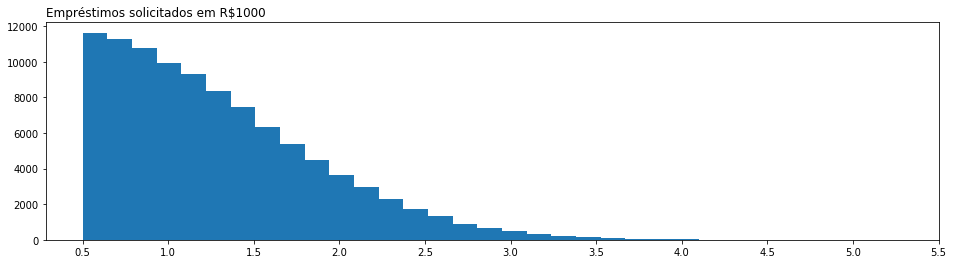

In [15]:
from scipy.stats import skewnorm
import pandas as pd
import seaborn as sns

N = 100_000
population = pd.Series(np.abs(skewnorm.rvs(40, size=N)) + 0.5)

plt.figure(figsize=(16, 4))

plt.hist(population, bins=30)
plt.title("Empréstimos solicitados em R$1000", loc="left")

plt.xticks(np.arange(0.5, 6, .5), np.arange(0.5, 6, .5));

In [17]:
sample_data = pd.Series(population.sample(1000))
sample_mean_05 = pd.Series([population.sample(5).mean() for _ in range(1000)])
sample_mean_20 = pd.Series([population.sample(20).mean() for _ in range(1000)])

results = pd.DataFrame({
    "sample_values": sample_data.reset_index(drop=True),
    "sample_mean_05": sample_mean_05.reset_index(drop=True),
    "sample_mean_20": sample_mean_20.reset_index(drop=True)
})


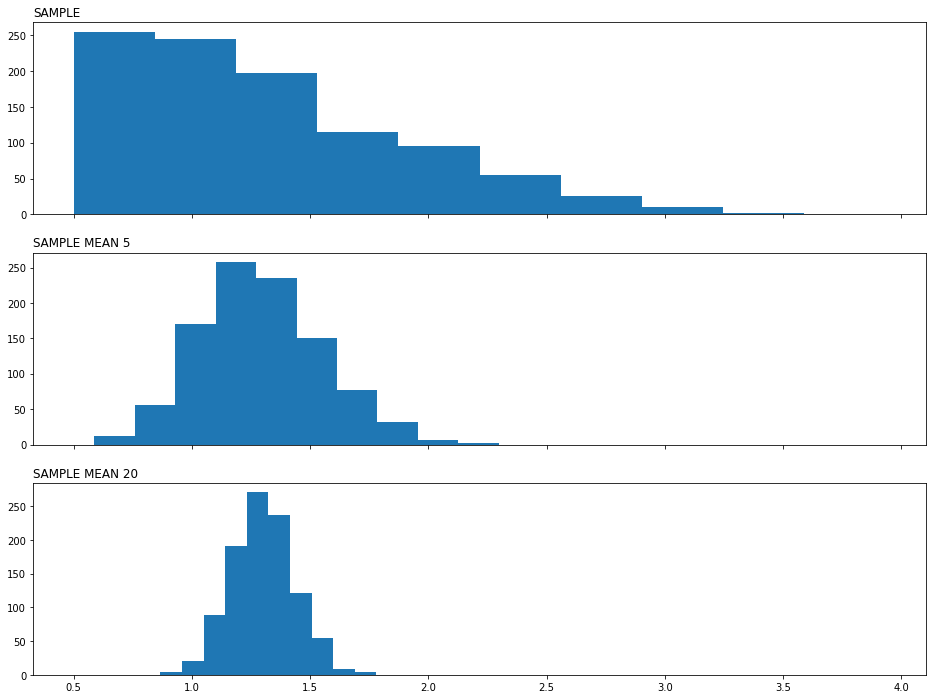

In [19]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(16, 12))

titles = ["Sample", "Sample Mean 5", "Sample Mean 20"]

for column, axi, title in zip(results.columns, axs, titles):
    axi.hist(results[column])
    axi.set_title(title.upper(), loc="left");

In [23]:
print("{:<35}{:<25}\n{:<35}{:<25}\n{:<35}{:<25}\n{:<35}{:<25}".format(
    "Média da População:", np.round(population.mean(), 3),
    "Média da Amostra:", np.round(sample_data.mean(), 3),
    "Média da Samp. Distrib. 5", np.round(sample_mean_05.mean(), 3),
    "Média da Samp. Distrib. 20", np.round(sample_mean_20.mean(), 3),
))

Média da População:                1.297                    
Média da Amostra:                  1.309                    
Média da Samp. Distrib. 5          1.295                    
Média da Samp. Distrib. 20         1.301                    


#### Teorema do Limite Central
O fenômeno acima é chamado de Central Limit Theorem e diz que as sample statistics de múltiplas amostragens assemelham-se à curva normal, mesmo que a população não seja distribuída com a curva normal, dado que o tamanho da amostra é grande o suficiente. 

O teorema permite que métodos estatísticos e probabilísticos que funcionam para distribuições normais possam ser aplicados a muitos problemas com outros tipos de distribuição.

**Obs**: O teorema recebe muita atenção na estatística tradicional e os cientistas de dados devem conhecê-lo, porém, como testes de hipóteses formais e intervalos de confiança não são tão presentes na ciência de dados e o **bootstrap** está disponível em qualquer caso, o teorema não é tão central na prática da ciência de dados.

#### Standard Error
O standard error é uma métrica que soma a variabilidade da sampling distribution. O standard error pode ser estimado usando uma estatística baseada na standard deviation (s) dos valores da amostra e o tamanho da amostra (n).

Standard error = $SE=\huge\frac{s}{\sqrt{n}}$


Veja que a medida que o tamanho da amostra aumenta, o standard erro diminui.

#### KEY IDEAS
- A distribuição da frequência de uma sample statistic nos fala como uma métrica seria diferente de amostra em amostra.
- A sampling distribution pode ser estimada via bootstrap, ou via formulas que se baseiam no teorema de limite central.
- Uma métrica que soma a variabilidade da sample statistic é o standard error.

### THE BOOTSTRAP
Uma maneira fácil e efetiva de estimar a sampling distribution de uma estatística, ou de parâmetros de um modelo, é sortear amostras adicionais com substituição da própria amostra e recalcular a estatística ou modelo para cada re-amostragem.

#### KEY TERMS FOR BOOTSTRAP
- **Bootstrap Sample**: Uma amostra tomada com substituição.
- **Resampling**: O processo de tomar repetidas amostras dos dados. Inclui procedimentos de bootstrap e permutação.

O algorítmo para o boostrap da média, para uma amostra de tamanho **n**, é o seguinte:
1. Retire um valor, anote, e devolva o valor.
2. Repita **n** vezes.
3. Anote a média dos valores "reamostrados".
4. Repita os passos 1-3 **R** vezes.
5. Use os **R** resultados para:
    - Calcular seu desvio padrão (estimativa do standard error da média da amostra)
    - Produzir um histograma ou boxplot.
    - Achar um intervalo de confiança

R é o número de iterações do bootsrap e é definido arbitrariamente. Quanto mais iterações você faz, mais acurada é a estimativa do standard error ou do intervalo de confiança. O resultado desse procedimento é um conjunto boostrap de sample statistics ou parâmetros estimados de um modelo.

In [49]:
from sklearn.utils import resample

R = 1000

results = []
for _ in range(R):
    bootstrap_sample = resample(sample_data)
    results.append(bootstrap_sample.median())

results = pd.Series(results)

print("Bootstrap Statistics:".upper())
print("original:      {}".format(np.round(population.median(), 4)))
print("bootstrap:     {}".format(np.round(results.mean(), 4)))
print("bias:          {}".format(np.round(results.mean() - population.median(), 4)))
print("std. error:    {}".format(np.round(results.std(), 4)))

BOOTSTRAP STATISTICS:
original:      1.1734
bootstrap:     1.1862
bias:          0.0127
std. error:    0.027


O bootstrap pode ser usado em dados de múltiplas variáveis, onde as linhas serão escolhidas como unidades.

Um modelo pode ser executado sobre dados bootstrap para estimar, por exemplo, a variabilidade dos parâmetros de um modelo, ou para melhorar o poder preditivo.

O bootstap pode ser usado para determinar o tamanho da amostra, experimentar diferentes valores de n para ver como a sampling distribution é afetada.

#### WARNING
O bootstrap não compensa para uma amostra pequena, pois não cria novos dados, nem preenche buracos no conjunto existente. Ele meramente informa sobre como várias amostras adicionais se comportariam quando sorteados da população.

#### KEY IDEAS
- O bootstrap é uma ferramenta poderosa para analisar a variabilidade de uma sample statistic.
- O bootstrap pode ser aplicado de forma similar para circunstâncias variadas, sem o estudo extensivo de aproximações matemáticas para sampling distributions.
- O bootstrap nos permite estimar sampling distributions para estatísticas em que nenhuma aproximação matemática foi desenvolvida.
- Quando aplicado a modelos preditivos, agregar múltiplas predições de amostras bootstrap supera o uso de um único modelo.
